In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
numerico_facil = pd.read_csv("numerico_facil.tsv", sep="\t")
numerico_dificil = pd.read_csv("numerico_dificil.tsv", sep="\t")

secuencia_facil = pd.read_csv("secuencia_facil_2.tsv", sep="\t")
secuencia_dificil = pd.read_csv("secuencia_dificil.tsv", sep="\t")


In [5]:
secuencia_facil.head()

,posX,posY,pressure,movementX,movementY,time
0,732.134766,510.842834,0.066667,0,0,-2210.5
1,722.679138,498.676727,0.066667,-7,-9,-1866.7
2,707.820312,477.048126,0.066667,-11,-16,-1850.0
3,647.034241,424.328339,0.066667,-45,-39,-1809.0
4,614.614929,404.051483,0.066667,-24,-15,-1791.5


In [6]:
def cut_time(i):
    if i.left <0:
        return 0 
    return i.left
    

In [7]:
def complete_position(L):
    new_L = []
    for i in range(0,len(L)):
        j = i
        while(str(L[j])=="nan"): 
            j=j-1        
        new_L.append(L[j])
    
    return new_L 
def calc_mov(L):
    new_L = [0]
    for i in range(1,len(L)):
        new_L.append(L[i]-L[i-1])
    return new_L 
    


In [8]:
def create_df(x, type_task,difficulty):
    x["time_label"] = pd.cut(x.time, range(0,1000*120+1, 30),include_lowest=True).apply(cut_time)
    x = x[["posX","posY","time_label","pressure"]].groupby("time_label", as_index=False).mean()
    x["posX"] = complete_position(x.posX)
    x["posY"] = complete_position(x.posY)
    x["movX"] = calc_mov(x.posX)
    x["movY"] = calc_mov(x.posY)
    x["distance"] = x.apply(lambda r: ((r.movX)**2 + (r.movY)**2)**(1/2), axis=1)
    x["speed"] = x["distance"]/30
    x["type"] = type_task
    x["difficulty"] = difficulty
    
    return x

In [9]:
secuencia_facil = pd.read_csv("secuencia_facil_2.tsv", sep="\t")
secuencia_facil = create_df(secuencia_facil,"Sequence","Easy")

In [10]:
secuencia_dificil = pd.read_csv("secuencia_dificil.tsv", sep="\t")
secuencia_dificil = create_df(secuencia_dificil,"Sequence","Hard")

In [11]:
numerico_facil = pd.read_csv("numerico_facil.tsv", sep="\t")
numerico_facil = create_df(numerico_facil,"Numeric","Easy")

In [12]:
numerico_dificil = pd.read_csv("numerico_dificil.tsv", sep="\t")
numerico_dificil = create_df(numerico_dificil,"Numeric","Hard")

In [13]:
verbal_facil = pd.read_csv("verbal_facil.tsv", sep="\t")
verbal_facil = create_df(verbal_facil,"Verbal","Easy")

In [14]:
verbal_dificil = pd.read_csv("verbal_dificil.tsv", sep="\t")
verbal_dificil = create_df(verbal_dificil,"Verbal","Hard")

,time_label,posX,posY,pressure,movX,movY,distance,speed,type,difficulty
0,0.0,231.662582,648.049438,0.062745,0.000000,0.000000,0.000000,0.000000,Sequence,Easy
1,30.0,168.850273,791.339050,0.062745,-62.812309,143.289612,156.452226,5.215074,Sequence,Easy
2,60.0,147.912842,921.110840,0.062745,-20.937431,129.771790,131.449965,4.381666,Sequence,Easy
3,90.0,175.604286,1025.874451,0.062745,27.691444,104.763611,108.361572,3.612052,Sequence,Easy
4,120.0,229.636368,1092.112061,0.062745,54.032082,66.237610,85.480330,2.849344,Sequence,Easy
5,150.0,308.658279,1138.072937,0.062745,79.021912,45.960876,91.415889,3.047196,Sequence,Easy
6,180.0,443.063095,1180.654175,0.062745,134.404816,42.581238,140.988710,4.699624,Sequence,Easy
7,210.0,568.012329,1179.302490,0.062745,124.949234,-1.351685,124.956545,4.165218,Sequence,Easy
8,240.0,668.647064,1125.230957,0.062745,100.634735,-54.071533,114.241326,3.808044,Sequence,Easy
9,270.0,721.328430,1063.724487,0.062745,52.681366,-61.506470,80.983777,2.699459,Sequence,Easy


In [26]:
df = pd.concat([secuencia_facil, secuencia_dificil, numerico_facil,numerico_dificil])

In [41]:
df.groupby(["type","difficulty"]).mean()[["pressure","speed"]]

pressure     speed
type     difficulty                    
Numeric  Easy        0.080220  2.440671
         Hard        0.055683  2.238061
Sequence Easy        0.058426  2.995060
         Hard        0.053534  2.849144

In [42]:
df.groupby(["type","difficulty"]).std()[["pressure","speed"]]

pressure     speed
type     difficulty                    
Numeric  Easy        0.013044  2.572632
         Hard        0.008397  2.253458
Sequence Easy        0.011414  2.558747
         Hard        0.012982  2.512182

In [43]:
df.groupby(["difficulty"]).mean()[["pressure","speed"]]

,pressure,speed
difficulty,,
Easy,0.068131,2.717866
Hard,0.054497,2.543603


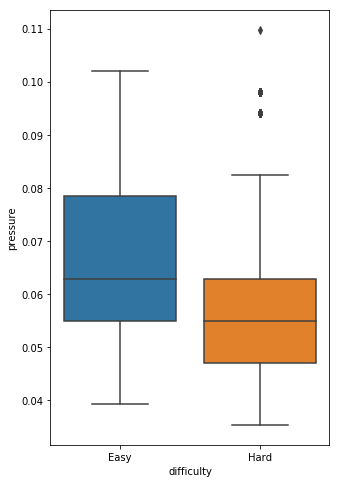

In [39]:
plt.figure(figsize=(5,8))
sns.boxplot(x="difficulty",y="pressure", data=df)

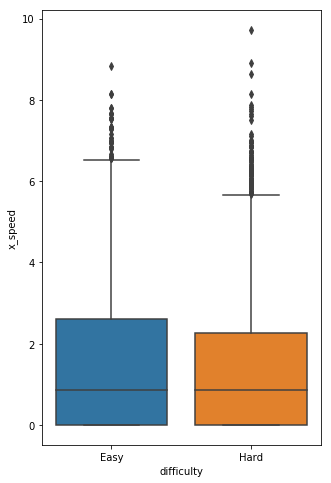

In [139]:
plt.figure(figsize=(5,8))
df2 = df[df["speed"]<10]
sns.boxplot(x="difficulty",y="x_speed",data=df2)

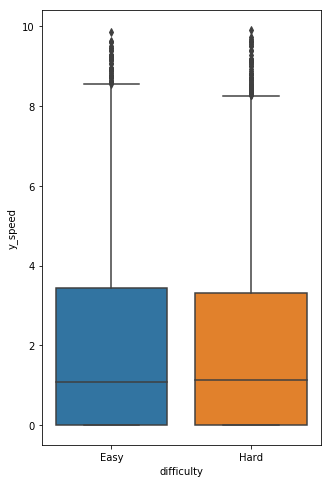

In [141]:
plt.figure(figsize=(5,8))
df2 = df[df["speed"]<10]
sns.boxplot(x="difficulty",y="y_speed",data=df2)

In [26]:
%matplotlib inline

/home/robert/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


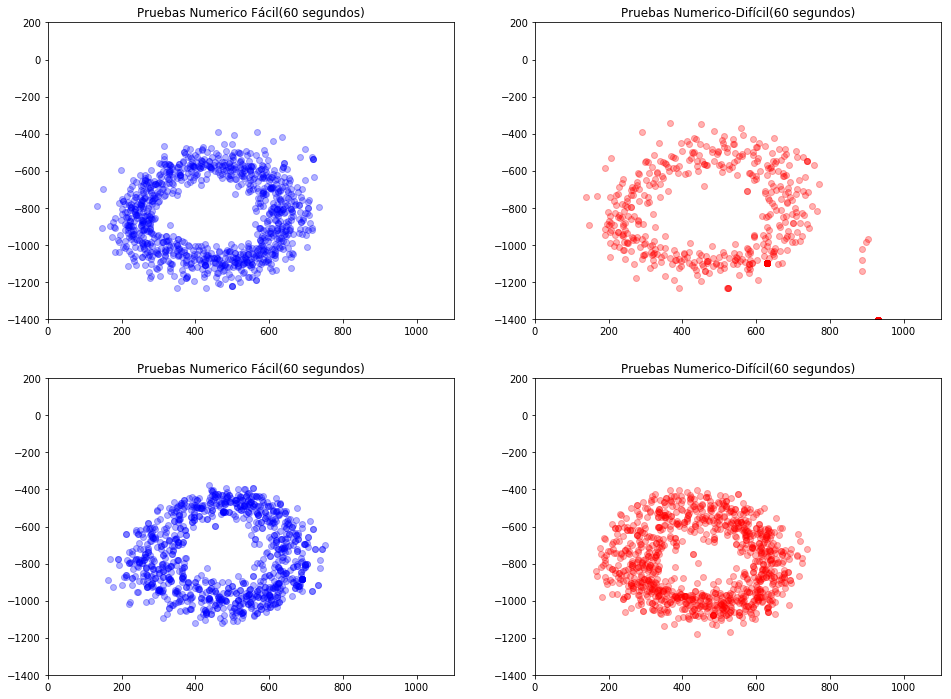

In [28]:
segundos = 30
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
plt.title("Pruebas Numerico Fácil(60 segundos)")
x = numerico_facil
for i in range(min(len(x.posX),int(segundos *1000/30))):
    posX = x.loc[i,"posX"]
    posY = x.loc[i,"posY"]*-1
    
    plt.plot(posX, posY, "o", c="b", markersize=6, alpha=0.3, linewidth=0)

plt.xlim([0,1100])
plt.ylim([-1400,200])
plt.subplot(2,2,2)
plt.title("Pruebas Numerico-Difícil(60 segundos)")
y = numerico_dificil
for i in range(min(len(y.posX),int(segundos *1000/30))):
    posX = y.loc[i,"posX"]
    posY = y.loc[i,"posY"]*-1
    
    plt.plot(posX, posY, "o", c="r", markersize=6, alpha=0.3)


plt.xlim([0,1100])
plt.ylim([-1400,200])
plt.savefig("movimiento_numerico_60segundos.jpg")
plt.subplot(2,2,1)
plt.title("Pruebas Numerico Fácil(60 segundos)")


plt.subplot(2,2,3)
plt.title("Pruebas Numerico Fácil(60 segundos)")
x = numerico_facil
for i in range(int(segundos *1000/30),min(len(x.posX),int(segundos *1000/30)*2)):
    posX = x.loc[i,"posX"]
    posY = x.loc[i,"posY"]*-1
    
    plt.plot(posX, posY, "o", c="b", markersize=6, alpha=0.3)

plt.xlim([0,1100])
plt.ylim([-1400,200])
plt.subplot(2,2,4)
plt.title("Pruebas Numerico-Difícil(60 segundos)")
y = numerico_dificil
for i in range(int(segundos *1000/30),min(len(y.posY),int(segundos *1000/30)*2)):
    posX = y.loc[i,"posX"]
    posY = y.loc[i,"posY"]*-1
    
    plt.plot(posX, posY, "o", c="r", markersize=6, alpha=0.3)


plt.xlim([0,1100])
plt.ylim([-1400,200])
plt.savefig("movimiento_numerico_60segundos.jpg")

In [242]:
## Import the packages
import numpy as np
from scipy import stats



#Gaussian distributed data with mean = 2 and var = 1
a = df[df["difficulty"]=="Easy"].speed
#Gaussian distributed data with with mean = 0 and var = 1
b = df[df["difficulty"]=="Hard"].speed
t, p = stats.ttest_ind(a,b, equal_var = False)
print("Ho: Velocidad durante tareas Fáciles == Velocidad durante tareas difíciles")
print("t = " + str(t))
print("p = " + str(p))

Ho: Velocidad durante tareas Fáciles == Velocidad durante tareas difíciles
t = -2.173287822779933
p = 0.029768414838818195


In [243]:
## Import the packages
import numpy as np
from scipy import stats


a = df[df["difficulty"]=="Easy"].fillna(0).pressure

b = df[df["difficulty"]=="Hard"].fillna(0).pressure
t, p = stats.ttest_ind(a,b)
print("Ho: Presión durante tareas Fáciles == Presión durante tareas difíciles")
print("t = " + str(t))
print("p = " + str(p))


Ho: Presión durante tareas Fáciles == Presión durante tareas difíciles
t = 10.995828461943553
p = 4.6698759718307776e-28


In [29]:
plt.plot?

In [240]:
df[df["difficulty"]=="Hard"].pressure.fillna(0).mean()

0.03709412012963245

In [241]:
df[df["difficulty"]=="Easy"].pressure.fillna(0).mean()

0.04181536243235071

In [51]:
import math

In [64]:
df.head()

,time_label,posX,posY,pressure,movX,movY,distance,speed,type,difficulty,x_speed,y_speed
0,0.0,231.662582,648.049438,0.062745,0.000000,0.000000,0.000000,0.000000,Sequence,Easy,0.000000,0.000000
1,30.0,168.850273,791.339050,0.062745,-62.812309,143.289612,156.452226,5.215074,Sequence,Easy,2.093744,4.776320
2,60.0,147.912842,921.110840,0.062745,-20.937431,129.771790,131.449965,4.381666,Sequence,Easy,0.697914,4.325726
3,90.0,175.604286,1025.874451,0.062745,27.691444,104.763611,108.361572,3.612052,Sequence,Easy,0.923048,3.492120
4,120.0,229.636368,1092.112061,0.062745,54.032082,66.237610,85.480330,2.849344,Sequence,Easy,1.801069,2.207920


In [138]:
secuencia_facil["x_speed"] = (secuencia_facil.movX/30).apply(abs)
secuencia_facil["y_speed"] = (secuencia_facil.movY/30).apply(abs)

secuencia_dificil["x_speed"] = (secuencia_dificil.movX/30).apply(abs)
secuencia_dificil["y_speed"] = (secuencia_dificil.movY/30).apply(abs)

numerico_facil["x_speed"] = (numerico_facil.movX/30).apply(abs)
numerico_facil["y_speed"] = (numerico_facil.movY/30).apply(abs)

numerico_dificil["x_speed"] = (numerico_dificil.movX/30).apply(abs)
numerico_dificil["y_speed"] = (numerico_dificil.movY/30).apply(abs)


df["x_speed"] = (df.movX/30).apply(abs)
df["y_speed"] = (df.movY/30).apply(abs)

In [112]:
maxposX = [max(secuencia_facil.posX), max(secuencia_dificil.posX), max(numerico_facil.posX) , max(numerico_dificil.posX)]
minposX = [min(secuencia_facil.posX) ,min(secuencia_dificil.posX), min(numerico_facil.posX),  min(numerico_dificil.posX)]

maxposY = [max(secuencia_facil.posY), max(secuencia_dificil.posY), max(numerico_facil.posY), max(numerico_dificil.posY)]
minposY = [min(secuencia_facil.posY) ,min(secuencia_dificil.posY), min(numerico_facil.posY),  min(numerico_dificil.posY)]


avgSpeedX = [secuencia_facil.x_speed.mean(),secuencia_dificil.x_speed.mean(), numerico_facil.x_speed.mean(), numerico_dificil.x_speed.mean()]
avgSpeedY = [secuencia_facil.y_speed.mean() , secuencia_dificil.y_speed.mean(), numerico_facil.y_speed.mean(),  numerico_dificil.y_speed.mean()]

maxSpeedX = [secuencia_facil.x_speed.max(), secuencia_dificil.x_speed.max(), numerico_facil.x_speed.max(), numerico_dificil.x_speed.max()]
maxSpeedY = [secuencia_facil.y_speed.max(), secuencia_dificil.y_speed.max(), numerico_facil.y_speed.max(), numerico_dificil.y_speed.max()]

interquartileRange_posX = [secuencia_facil.posX.quantile(0.75) -secuencia_facil.posX.quantile(0.25), secuencia_dificil.posX.quantile(0.75) - secuencia_dificil.posX.quantile(0.25), numerico_facil.posX.quantile(0.75) - numerico_facil.posX.quantile(0.25), numerico_dificil.posX.quantile(0.75) - numerico_dificil.posX.quantile(0.25)]


difficulty = ["Easy", "Hard", "Easy", "Hard"]
typeT = ["Sequence","Sequence", "Numeric", "Numeric"]
user = ["p1", "p1" ,"p1", "p1"]

In [114]:
datos = pd.DataFrame({"user": user,"typeT":typeT, "difficulty":difficulty, "maxPosX": maxposX , "minposX": minposX ,"interquartileRange_posX":interquartileRange_posX,"maxPosX": maxposY , "minposY": minposY ,"avgSpeedX": avgSpeedX, "avgSpeedY": avgSpeedY,"maxSpeedX":maxSpeedX ,"maxSpeedY":maxSpeedY  })

In [115]:
datos

,user,typeT,difficulty,maxPosX,minposX,interquartileRange_posX,minposY,avgSpeedX,avgSpeedY,maxSpeedX,maxSpeedY
0,p1,Sequence,Easy,1409.106506,22.963636,270.160522,455.419495,1.679814,2.114192,16.389733,17.212777
1,p1,Sequence,Hard,1375.938660,62.437550,228.032837,478.762054,1.421404,2.155986,10.270524,16.888562
2,p1,Numeric,Easy,1232.697998,132.531013,213.426788,378.367493,1.266152,1.795424,8.847752,12.481521
3,p1,Numeric,Hard,1406.403076,139.132622,237.741089,314.833435,1.182167,1.620756,11.256683,28.635398


In [131]:
numerico_facil.speed.describe()

count    4000.000000
mean        2.440671
std         2.572632
min         0.000000
25%         0.000000
50%         2.590113
75%         4.209860
max        13.467136
Name: speed, dtype: float64

In [133]:
numerico_dificil.speed.describe()

count    4000.000000
mean        2.238061
std         2.253458
min         0.000000
25%         0.000000
50%         2.620074
75%         3.886552
max        29.345444
Name: speed, dtype: float64

In [134]:
secuencia_facil.speed.describe()

count    4000.000000
mean        2.995060
std         2.558747
min         0.000000
25%         0.000000
50%         3.247891
75%         4.499837
max        20.892903
Name: speed, dtype: float64

In [135]:
secuencia_dificil.speed.describe()

count    4000.000000
mean        2.849144
std         2.512182
min         0.000000
25%         0.000000
50%         2.854680
75%         4.111368
max        17.336097
Name: speed, dtype: float64